In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
wego = pd.read_csv("../data/headway_data.csv")

wego.head()

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0    120230801             1      99457890  2023-08-01          22   
1    120230801             1      99457891  2023-08-01          22   
2    120230801             1      99457892  2023-08-01          22   
3    120230801             1      99457893  2023-08-01          22   
4    120230801             1      99457894  2023-08-01          22   

   BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  ...  \
0        2200      1040   345104            0          TO DOWNTOWN  ...   
1        2200      1040   345104            0          TO DOWNTOWN  ...   
2        2200      1040   345104            0          TO DOWNTOWN  ...   
3        2200      1040   345104            0          TO DOWNTOWN  ...   
4        2200      1040   345105            0        FROM DOWNTOWN  ...   

  ACTUAL_HDWY  HDWY_DEV  ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  \
0         NaN       NaN                     0                    0   
1         NaN       NaN                     0                    0   
2         NaN       NaN                     0                    0   
3         NaN       NaN                     0                    0   
4         NaN       NaN                     0                    0   

   ADJUSTED_ONTIME_COUNT STOP_CANCELLED PREV_SCHED_STOP_CANCELLED IS_RELIEF  \
0                      1              0                       0.0         0   
1                      1              0                       0.0         0   
2                      1              0                       0.0         0   
3                      1              0                       NaN         0   
4                      1              0                       0.0         0   

   DWELL_IN_MINS  SCHEDULED_LAYOVER_MINUTES  
0       6.500000                        NaN  
1       0.000000                        NaN  
2       0.000000                        NaN  
3       0.000000                        NaN  
4      12.866666                        5.0  

[5 rows x 30 columns]

In [25]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

# Cleaning

In [26]:
# drop trips where previous stop was cancelled

wego = wego.drop(wego[wego.PREV_SCHED_STOP_CANCELLED == 1.0].index)

In [27]:
wego = wego.drop(wego[(wego['ADJUSTED_EARLY_COUNT'] == 0.0) & (wego['ADJUSTED_LATE_COUNT'] == 0.0) & (wego['ADJUSTED_ONTIME_COUNT'] == 0.0)].index)

In [28]:
percentile1adh=wego['ADHERENCE'].quantile(0.001)
print(percentile1adh)

percentile99adh=wego['ADHERENCE'].quantile(0.999)
print(percentile99adh)

print('')

percentile1hdwy=wego['HDWY_DEV'].quantile(0.001)
print(percentile1hdwy)

percentile99hdwy=wego['HDWY_DEV'].quantile(0.999)
print(percentile99hdwy)

-57.040499999999994
9.466666

-21.624767162
56.43715000000084


In [29]:
wego = wego.drop(wego[wego.ADHERENCE < percentile1adh].index)
wego = wego.drop(wego[wego.ADHERENCE > percentile99adh].index)
wego = wego.drop(wego[wego.HDWY_DEV < percentile1hdwy].index)
wego = wego.drop(wego[wego.HDWY_DEV > percentile99hdwy].index)

In [30]:
# drop trips where scheduled headway was 0
wego = wego.drop(wego[wego.SCHEDULED_HDWY == 0].index)

In [31]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                333927 non-null  int64  
 1   SERVICE_ABBR               333927 non-null  int64  
 2   ADHERENCE_ID               333927 non-null  int64  
 3   DATE                       333927 non-null  object 
 4   ROUTE_ABBR                 333927 non-null  int64  
 5   BLOCK_ABBR                 333927 non-null  int64  
 6   OPERATOR                   333927 non-null  int64  
 7   TRIP_ID                    333927 non-null  int64  
 8   OVERLOAD_ID                333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME       333927 non-null  object 
 10  TIME_POINT_ABBR            333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE        333922 non-null  float64
 12  TRIP_EDGE                  333927 non-null  int64  
 13  LATITUDE                   333927 

# Q1

### What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [90]:
wego_on_time = (wego
 [['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']]
 .mean()*100
 ).reset_index()
# .sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)
# wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

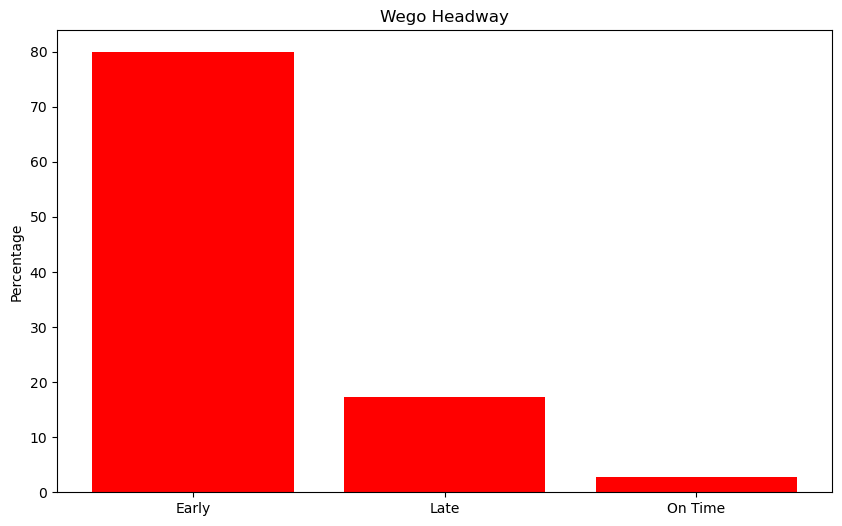

In [91]:
x=wego_on_time['index']
y=wego_on_time[0]

ax=['Early', 'Late', 'On Time']

plt.figure(figsize=(10,6))

plt.bar(ax, y, color='r')
plt.ylabel("Percentage")
plt.title("Wego Headway")
plt.show()

In [35]:
# # Jessica's alternate
# # Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

In [37]:
wego.agg({'ADHERENCE': ['min','max','mean']})

ADHERENCE
min  -56.800000
max    9.466666
mean  -3.085795

In [38]:
wego.agg({'HDWY_DEV': ['min','max','mean']})

HDWY_DEV
min  -21.600000
max   56.400000
mean   0.398935

C:\Users\tayjy\AppData\Local\Temp\ipykernel_23140\928343750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wego['HDWY_DEV'])
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\AppData\Local\Temp\ipykernel_23140\928343750.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibili

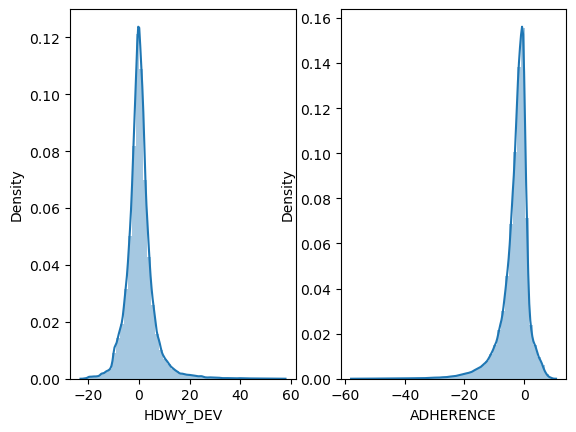

In [40]:
plt.subplot(1,2,1)
sns.distplot(wego['HDWY_DEV'])

plt.subplot(1,2,2)
sns.distplot(wego['ADHERENCE'])

plt.show()

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

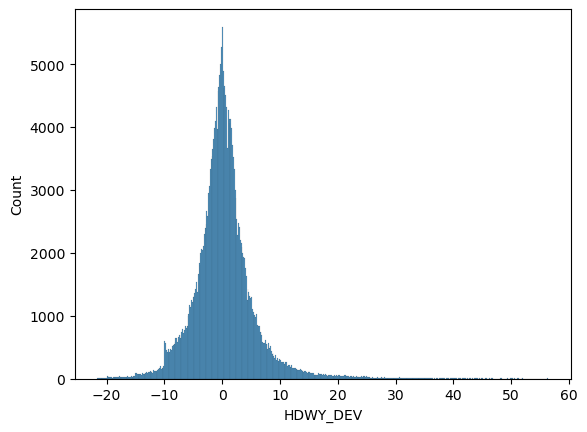

In [41]:
sns.histplot(data=wego, x="HDWY_DEV")

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

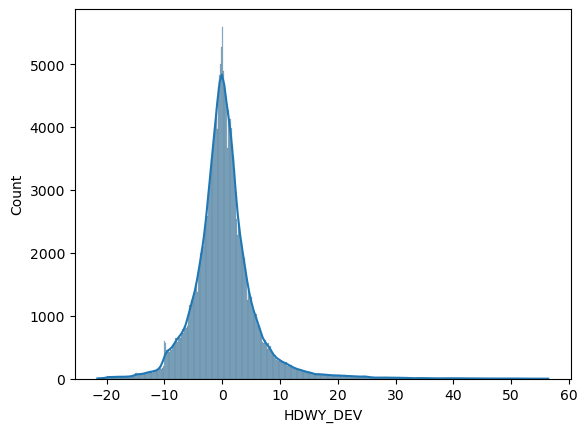

In [43]:
sns.histplot(data=wego, x="HDWY_DEV", kde=True)

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ADHERENCE', ylabel='Count'>

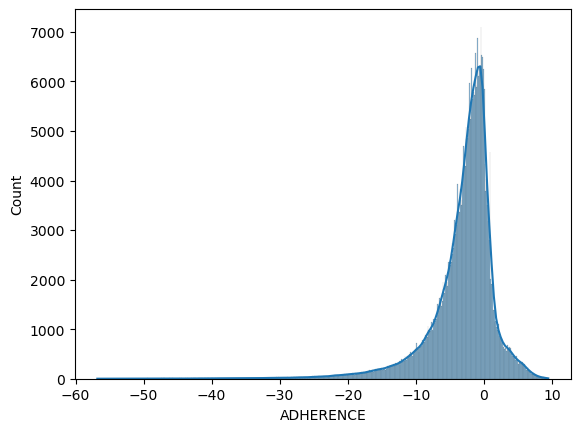

In [44]:
sns.histplot(data=wego, x="ADHERENCE", kde=True)

<Axes: ylabel='HDWY_DEV'>

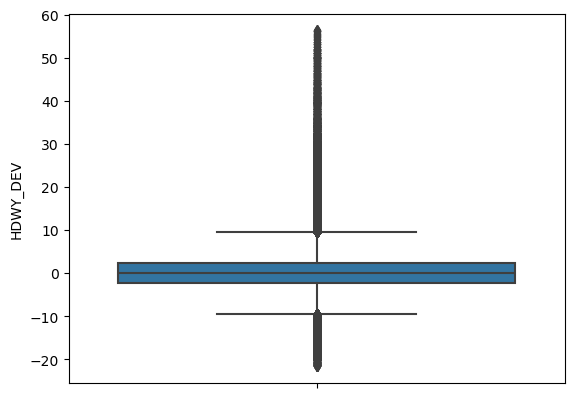

In [45]:
sns.boxplot( y=wego['HDWY_DEV'])

<Axes: ylabel='ADHERENCE'>

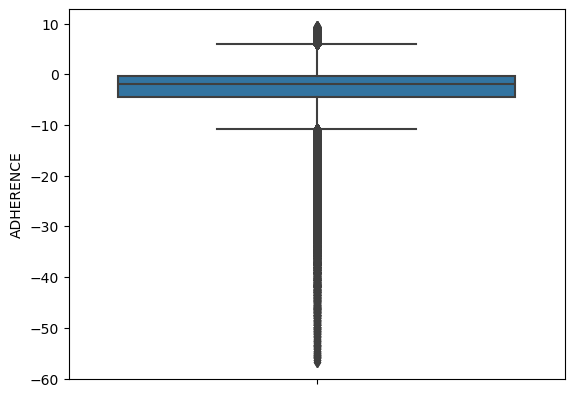

In [46]:
sns.boxplot( y=wego['ADHERENCE'])

In [47]:
# create headway deviation % column and bunching/gapping, acceptable range for each trip, is within range 1/0

In [48]:
# del wego['BUNCHING_OR_GAPPING']

In [49]:
wego['HEADWAY_DEVIATION_PERCENTAGE'] = round((wego['HDWY_DEV']/wego['SCHEDULED_HDWY'])*100,2)



wego['HEADWAY_IS_BUNCHING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       < -50, '1','0')
wego['HEADWAY_IS_ACCEPTABLE'] = np.where((wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       >= -50)&(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       <= 50), '1','0')
wego['HEADWAY_IS_GAPPING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       > 50, '1','0')
wego['HEADWAY_IS_UNKNOWN'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'].isna()
                       == True, '1','0')

In [50]:
wego.head(500)

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0      120230801             1      99457890  2023-08-01          22   
1      120230801             1      99457891  2023-08-01          22   
2      120230801             1      99457892  2023-08-01          22   
3      120230801             1      99457893  2023-08-01          22   
4      120230801             1      99457894  2023-08-01          22   
5      120230801             1      99457895  2023-08-01          22   
6      120230801             1      99457896  2023-08-01          22   
7      120230801             1      99457897  2023-08-01          22   
8      120230801             1      99457898  2023-08-01          22   
9      120230801             1      99457899  2023-08-01          22   
10     120230801             1      99457900  2023-08-01          22   
11     120230801             1      99457901  2023-08-01          22   
12     120230801             1      99457902  2023-08-01          22   
13     120230801             1      99457903  2023-08-01          22   
14     120230801             1      99457904  2023-08-01          22   
15     120230801             1      99457905  2023-08-01          22   
16     120230801             1      99457906  2023-08-01          22   
17     120230801             1      99457907  2023-08-01          22   
18     120230801             1      99457908  2023-08-01          22   
19     120230801             1      99457909  2023-08-01          22   
20     120230801             1      99457910  2023-08-01          22   
21     120230801             1      99457911  2023-08-01          22   
22     120230801             1      99457912  2023-08-01          22   
23     120230801             1      99457913  2023-08-01          22   
24     120230801             1      99457914  2023-08-01          22   
25     120230801             1      99457915  2023-08-01          22   
26     120230801             1      99457916  2023-08-01          22   
27     120230801             1      99457917  2023-08-01          22   
28     120230801             1      99457918  2023-08-01          22   
29     120230801             1      99457919  2023-08-01          22   
30     120230801             1      99457920  2023-08-01          22   
31     120230801             1      99457921  2023-08-01          22   
32     120230801             1      99457922  2023-08-01          22   
33     120230801             1      99457923  2023-08-01          22   
34     120230801             1      99457924  2023-08-01          22   
35     120230801             1      99457925  2023-08-01          22   
36     120230801             1      99457926  2023-08-01          22   
37     120230801             1      99457927  2023-08-01          22   
38     120230801             1      99457928  2023-08-01          22   
41     120230801             1      99457931  2023-08-01          22   
43     120230801             1      99457933  2023-08-01          22   
44     120230801             1      99457934  2023-08-01          22   
45     120230801             1      99457935  2023-08-01          22   
46     120230801             1      99457936  2023-08-01          22   
47     120230801             1      99457937  2023-08-01          22   
48     120230801             1      99457938  2023-08-01          22   
49     120230801             1      99457939  2023-08-01          22   
50     120230801             1      99457940  2023-08-01          22   
51     120230801             1      99457941  2023-08-01          22   
52     120230801             1      99457942  2023-08-01          22   
54     120230801             1      99457944  2023-08-01          22   
55     120230801             1      99457945  2023-08-01          22   
57     120230801             1      99457947  2023-08-01          22   
58     120230801             1      99457948  2023-08-01          22   
59     120230801             1      99457949 

In [51]:
wego['HEADWAY_IS_BUNCHING'] = wego['HEADWAY_IS_BUNCHING'].astype(int)
wego['HEADWAY_IS_ACCEPTABLE'] = wego['HEADWAY_IS_ACCEPTABLE'].astype(int)
wego['HEADWAY_IS_GAPPING'] = wego['HEADWAY_IS_GAPPING'].astype(int)
wego['HEADWAY_IS_UNKNOWN'] = wego['HEADWAY_IS_UNKNOWN'].astype(int)

In [52]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CALENDAR_ID                   333927 non-null  int64  
 1   SERVICE_ABBR                  333927 non-null  int64  
 2   ADHERENCE_ID                  333927 non-null  int64  
 3   DATE                          333927 non-null  object 
 4   ROUTE_ABBR                    333927 non-null  int64  
 5   BLOCK_ABBR                    333927 non-null  int64  
 6   OPERATOR                      333927 non-null  int64  
 7   TRIP_ID                       333927 non-null  int64  
 8   OVERLOAD_ID                   333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME          333927 non-null  object 
 10  TIME_POINT_ABBR               333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE           333922 non-null  float64
 12  TRIP_EDGE                     333927 non-null  in

In [53]:
wego[['HEADWAY_IS_BUNCHING','HEADWAY_IS_ACCEPTABLE','HEADWAY_IS_GAPPING','HEADWAY_IS_UNKNOWN']].value_counts().sort_values().reset_index()

HEADWAY_IS_BUNCHING  HEADWAY_IS_ACCEPTABLE  HEADWAY_IS_GAPPING  \
0                    1                      0                   0   
1                    0                      0                   1   
2                    0                      0                   0   
3                    0                      1                   0   

   HEADWAY_IS_UNKNOWN   count  
0                   0   17243  
1                   0   20562  
2                   1   72640  
3                   0  223482

In [54]:
# wego[wego['SCHEDULED_HDWY']==1e-10]

In [55]:
# wego['SCHEDULED_HDWY'].value_counts().reset_index().sort_values(by='SCHEDULED_HDWY')

# Q2

### How does direction of travel, route, or location affect the headway and on-time performance?

In [56]:
total = wego['ROUTE_DIRECTION_NAME'].value_counts().reset_index()
total

ROUTE_DIRECTION_NAME   count
0        FROM DOWNTOWN  176992
1          TO DOWNTOWN  156935

In [57]:
# 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
on_time = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
on_time

ROUTE_DIRECTION_NAME  ADJUSTED_ONTIME_COUNT   count
0          TO DOWNTOWN                      1  133661
1        FROM DOWNTOWN                      1  133139
2        FROM DOWNTOWN                      0   43853
3          TO DOWNTOWN                      0   23274

In [58]:
early = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_EARLY_COUNT']].value_counts().reset_index()
early

ROUTE_DIRECTION_NAME  ADJUSTED_EARLY_COUNT   count
0        FROM DOWNTOWN                     0  171880
1          TO DOWNTOWN                     0  152605
2        FROM DOWNTOWN                     1    5112
3          TO DOWNTOWN                     1    4330

In [59]:
late = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_LATE_COUNT']].value_counts().reset_index()
late

ROUTE_DIRECTION_NAME  ADJUSTED_LATE_COUNT   count
0        FROM DOWNTOWN                    0  138251
1          TO DOWNTOWN                    0  137991
2        FROM DOWNTOWN                    1   38741
3          TO DOWNTOWN                    1   18944

In [60]:
print(str(round(((on_time['count'].iloc[0])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were on time.')
print(str(round(((on_time['count'].iloc[1])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were on time.')
print('')
print(str(round(((early['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were early.')
print(str(round(((early['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were early.')
print('')
print(str(round(((late['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were late.')
print(str(round(((late['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were late.')

85.17% of (to downtown) trips were on time.
75.22% of (from downtown) trips were on time.

2.76% of (to downtown) trips were early.
2.89% of (from downtown) trips were early.

12.07% of (to downtown) trips were late.
21.89% of (from downtown) trips were late.


In [61]:
# initialize list of lists
data = [['To Downtown', 85.17, 'On Time'],
        ['To Downtown', 2.76, 'Early'],
        ['To Downtown', 12.07, 'Late'],
        ['From Downtown', 75.22, 'On Time'],
        ['From Downtown', 2.89, 'Early'],
        ['From Downtown', 21.89, 'Late']]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Direction of Travel', 'Percent', 'On Time Performance'])
 
# print dataframe.
df

Direction of Travel  Percent On Time Performance
0         To Downtown    85.17             On Time
1         To Downtown     2.76               Early
2         To Downtown    12.07                Late
3       From Downtown    75.22             On Time
4       From Downtown     2.89               Early
5       From Downtown    21.89                Late

<Axes: xlabel='On Time Performance', ylabel='Percent'>

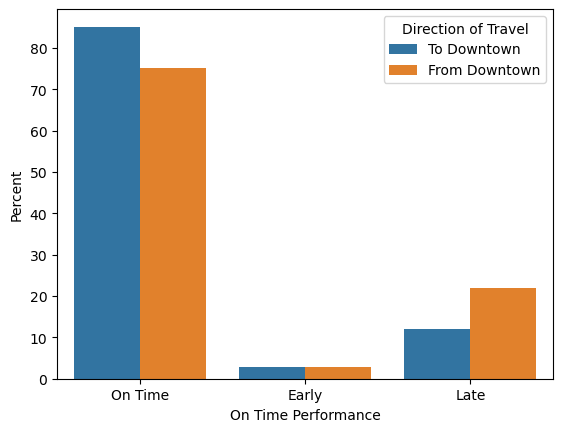

In [62]:
sns.barplot(df, x='On Time Performance', y='Percent', hue='Direction of Travel')

In [63]:


# wego.groupby('ROUTE_DIRECTION_NAME')['HEADWAY_DEVIATION_PERCENTAGE'].agg(['min', 'mean', 'max'])

In [64]:
# print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'ADHERENCE': ['min','max','mean']}))

In [65]:
# # wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']}).agg({'HDWY_DEV': ['mean']})
# round(wego.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HEADWAY_DEVIATION_PERCENTAGE', 'mean'), Bunching=('HEADWAY_IS_BUNCHING', 'mean')),2).reset_index()
# # print('')
# # wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']})
# # sns.barplot(df2, x='ROUTE_ABBR', y='HDWY_DEV')

In [66]:
# # initialize list of lists
# data2 = [['3', 0.54, 'Headway Deviation Percentage'],
#         ['3', -3.71, 'Adherence'],
#         ['7', 0.33, 'Headway Deviation Percentage'],
#         ['7', -3.48, 'Adherence'],
#         ['22', 0.57, 'Headway Deviation Percentage'],
#         ['22', -1.07, 'Adherence'],
#         ['23', 0.82, 'Headway Deviation Percentage'],
#         ['23', -1.64, 'Adherence'],
#         ['50', 0.17, 'Headway Deviation Percentage'],
#         ['50', -2.42, 'Adherence'],
#         ['52', 0.71, 'Headway Deviation Percentage'],
#         ['52', -3.73, 'Adherence'],
#         ['55', 0.19, 'Headway Deviation Percentage'],
#         ['55', -4.62, 'Adherence'],
#         ['56', 0.12, 'Headway Deviation Percentage'],
#         ['56', -2.65, 'Adherence']]
# # Create the pandas DataFrame
# df2 = pd.DataFrame(data2, columns=['Route', 'Mean', 'Metric'])
 
# # print dataframe.
# df2

In [67]:
# sns.barplot(df2, x='Route', y='Mean', hue='Metric')

In [68]:
# print(wego.groupby(by='ROUTE_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

In [69]:
# print(wego.groupby(by='TIME_POINT_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='TIME_POINT_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

In [70]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['ROUTE_ABBR'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

ROUTE_ABBR  HEADWAY_IS_BUNCHING  HEADWAY_IS_GAPPING  HEADWAY_IS_ACCEPTABLE  \
4          50             2.389684            2.966994              75.750621   
0           3             4.664030            6.161675              69.438272   
7          56             6.134370            6.555776              69.192819   
5          52             5.810700            7.209877              67.637860   
3          23             1.552072            4.541154              65.432509   
2          22             1.173315            2.740530              62.039055   
1           7             2.493678            3.352350              60.836323   
6          55            10.749338           10.390915              60.652196   

   HEADWAY_IS_UNKNOWN  
4           18.892701  
0           19.736023  
7           18.117034  
5           19.341564  
3           28.474264  
2           34.047100  
1           33.317650  
6           18.207550

In [71]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['ROUTE_ABBR'])
 [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
 .mean()*100
 ).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)

ROUTE_ABBR  ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  \
2          22              2.535199             8.171304   
3          23              3.160398             8.049298   
4          50              2.791908            11.877440   
7          56              2.919008            14.838290   
1           7              2.205493            19.802388   
5          52              3.067901            19.971193   
0           3              2.988623            20.971469   
6          55              2.522360            27.457877   

   ADJUSTED_ONTIME_COUNT  
2              89.293496  
3              88.790304  
4              85.330652  
7              82.242702  
1              77.992119  
5              76.960905  
0              76.039908  
6              70.019764

In [72]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['TIME_POINT_ABBR'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

TIME_POINT_ABBR  HEADWAY_IS_BUNCHING  HEADWAY_IS_GAPPING  \
2         28&CHARL             3.080671            3.682476   
5             CH46             3.170277            3.744083   
23            HLWD             3.118712            3.894797   
8             CV23             2.803738            5.214682   
10            DKTL             2.116807            6.350421   
51            N1SP             2.345663            6.573012   
4             BRCJ             2.041331            5.493952   
26          LINWAL             2.662230            5.158070   
24            HPKL             0.000000            0.897227   
12            EDBC             0.944882            7.559055   
0             21BK             4.605602            5.980409   
16        GXMADISO             5.803066            6.718798   
15        GXGRNFLD             6.776519            6.930999   
14        GXFIVEPT             7.028195            7.233999   
25            HRWB             7.204471            8.710971   
56            WE23             7.528582            9.097543   
57            WE31             7.496962            9.295261   
59            WMRT             8.227996            8.813202   
52            NVFG             8.969711            9.449187   
54            THNV             9.475783            9.393691   
58            WHBG             2.342710            3.088118   
47          MXBELL            13.281011           12.567526   
48         MXDONEL            13.842239           13.669211   
49         MXTHOMP            14.418838           13.607214   
53            SAMS            14.193279           14.798581   
6             CLFF             0.065232            5.870841   
50         MXWHARF            16.173235           14.992999   
13            ELIZ             0.000000            0.313480   
9            DCSCC             4.265403           23.578199   
17        GXRVRGAT             4.600784            5.137198   
42          MCC5_9             1.645618            2.544967   
19            HCKP             0.382452            1.439820   
55            WALM             0.471092            1.042113   
35         MCC5_10             0.972603            1.794521   
20           HDANT             0.517879            1.800247   
46            MP&R             0.149514            1.121356   
44            MHSP             0.000000            0.412603   
34          MCC5_1             1.111269            1.410457   
1         25ACLARK             0.041999            1.049979   
18            HBHS             1.188657            1.511292   
33         MCC4_24             1.011634            2.883156   
22            HHWM             1.956610            2.858881   
11           DWMRT             1.186830            2.664625   
39          MCC5_5             2.003484            2.787456   
29         MCC4_18             3.362122            3.516348   
30         MCC4_19             3.774904            4.543866   
28         MCC4_15             5.033323            4.864220   
45            MLKS             3.960396            0.990099   
43            MEIG             0.000000            0.000000   
41          MCC5_7             0.000000            0.000000   
40          MCC5_6             0.000000            0.000000   
38          MCC5_2             0.000000            0.000000   
37         MCC5_12             0.000000            0.000000   
36         MCC5_11             0.000000            0.000000   
32         MCC4_22             0.000000            0.000000   
31         MCC4_20             0.000000            0.000000   
27         MCC4_13             0.000000            0.000000   
21            HEAD             0.000000            0.000000   
7             CRES             0.000000            0.000000   
3             ARTS             0.000000            0.000000   
60            YGKG             0.000000            0.000000   

    HEADWAY_IS_ACCEPTABLE  HEADWAY_IS_UNKNOWN  
2               91.517409            1.719444  


In [73]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['TIME_POINT_ABBR'])
 [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
 .mean()*100
 ).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)

TIME_POINT_ABBR  ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  \
40          MCC5_6              0.000000             0.862069   
1         25ACLARK              0.503990             1.595968   
35         MCC5_10              0.246575             4.136986   
33         MCC4_24              0.404654             4.312089   
44            MHSP              0.900225             7.951988   
29         MCC4_18              0.678593             9.006786   
43            MEIG              4.166667             5.555556   
55            WALM              1.812991             8.479657   
34          MCC5_1              0.612623            10.044166   
11           DWMRT              1.577335             9.548239   
10            DKTL              4.756440             6.477939   
7             CRES              0.000000            12.500000   
13            ELIZ              4.075235             9.404389   
38          MCC5_2              4.166667             9.375000   
8             CV23              5.783557             7.937153   
6             CLFF              3.261579            10.632746   
51            N1SP              7.771620             6.598789   
16        GXMADISO              2.922111            11.791337   
2         28&CHARL              2.894397            12.337011   
5             CH46              3.299383            12.767178   
23            HLWD              2.931877            13.437769   
15        GXGRNFLD              2.924820            14.304840   
19            HCKP              0.899888            16.760405   
46            MP&R              1.345627            16.620982   
39          MCC5_5              1.157292            17.048283   
42          MCC5_9              2.468427            15.882128   
30         MCC4_19              1.258301            17.476407   
14        GXFIVEPT              4.270426            14.467998   
17        GXRVRGAT              3.266625            15.934255   
18            HBHS              1.273561            18.933605   
59            WMRT              3.780431            17.521067   
24            HPKL              3.915171            17.699837   
58            WHBG              3.159109            18.661816   
12            EDBC              0.866142            21.259843   
22            HHWM              0.638686            21.877534   
4             BRCJ              3.125000            20.211694   
26          LINWAL              4.373663            19.229855   
52            NVFG              4.911706            19.249211   
28         MCC4_15              0.845519            23.405948   
20           HDANT              1.454994            23.649815   
54            THNV              3.049138            22.422892   
57            WE31              3.742406            22.114216   
25            HRWB              4.045681            22.062933   
56            WE23              4.281197            22.318171   
45            MLKS             16.831683             9.900990   
0             21BK              2.938649            23.835711   
49         MXTHOMP              5.651303            25.160321   
47          MXBELL              2.038528            29.375191   
53            SAMS              3.443957            30.953872   
50         MXWHARF              3.140628            31.426285   
48         MXDONEL              2.788804            33.241730   
3             ARTS              1.408451            39.436620   
31         MCC4_20              1.063830            40.425532   
9            DCSCC              5.746445            37.796209   
60            YGKG              1.475596            44.721907   
32         MCC4_22             14.705882            33.333333   
21            HEAD             44.444444             4.166667   
37         MCC5_12              0.000000            58.974359   
36         MCC5_11              0.000000            68.852459   
27         MCC4_13             66.666667             4.545455   
41          MCC5_7              8.3333

# Q3

### How does time of day or day of week affect headway and on-time performance?

In [74]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CALENDAR_ID                   333927 non-null  int64  
 1   SERVICE_ABBR                  333927 non-null  int64  
 2   ADHERENCE_ID                  333927 non-null  int64  
 3   DATE                          333927 non-null  object 
 4   ROUTE_ABBR                    333927 non-null  int64  
 5   BLOCK_ABBR                    333927 non-null  int64  
 6   OPERATOR                      333927 non-null  int64  
 7   TRIP_ID                       333927 non-null  int64  
 8   OVERLOAD_ID                   333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME          333927 non-null  object 
 10  TIME_POINT_ABBR               333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE           333922 non-null  float64
 12  TRIP_EDGE                     333927 non-null  in

In [75]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format = 'mixed')

In [76]:
wego_day = (wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['day'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)
# .sort_values('mean', ascending=False)

# Averages for all days indicate a tendancy toward gapping - related to adherence
# The smallest average gapping values are occuring on Mondays and Saturdays
# The largest average gapping values occur on Thursdays and Fridays

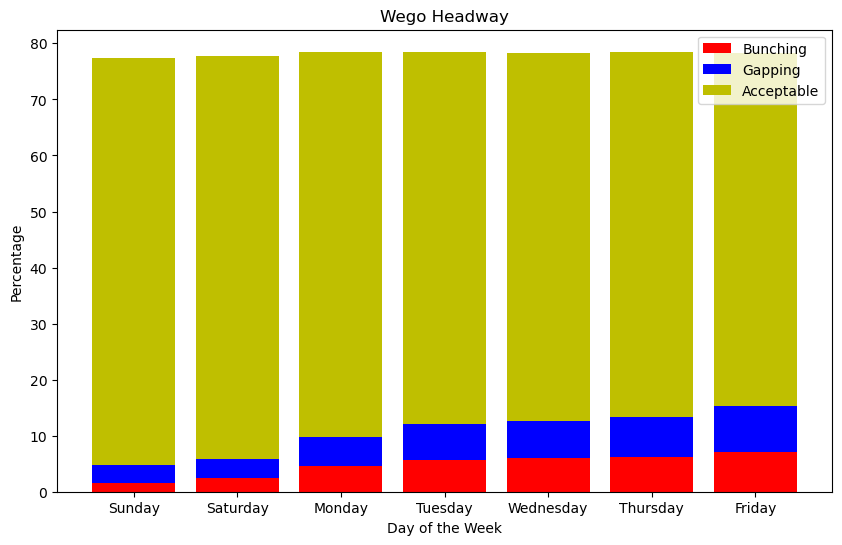

In [77]:
x=wego_day['day']
y1=wego_day['HEADWAY_IS_BUNCHING']
y2=wego_day['HEADWAY_IS_GAPPING']
y3=wego_day['HEADWAY_IS_ACCEPTABLE']
# y4=wego_day['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(10,6))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Day of the Week")
plt.ylabel("Percentage")
plt.legend(["Bunching", "Gapping", "Acceptable", "Unknown"])
plt.title("Wego Headway")
plt.show()

In [78]:
# # Creating dataframe to look at headway deviation perc by day and hour
# dh = wego.assign(day = wego['SCHEDULED_TIME'].dt.day_name()).assign(hour = wego['SCHEDULED_TIME'].dt.hour).groupby(['day','hour'])['HEADWAY_DEVIATION_PERCENTAGE'].mean().reset_index()

# # Graphing this data with Seaborn

# # Defining the order of days of the week
# days_of_week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# # Creating the FacetGrid
# g = sns.FacetGrid(dh, 
#                   col="day", 
#                   col_order=days_of_week_order, 
#                   col_wrap=4)
# g.map_dataframe(sns.barplot, 
#                 x="hour", 
#                 y="HEADWAY_DEVIATION_PERCENTAGE", 
#                 palette='husl')

# # Fine Tuning
# g.fig.suptitle("Headway Deviation Percentage by Hour and Day", fontsize=16, y=1.05)
# g.set_axis_labels("Hour of Day", "Headway Deviation Percentage")
# g.set_titles("{col_name}")
# g.set_xticklabels(rotation=45)

# # Show the plot
# plt.show()

In [79]:
wego_hour = (wego
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .groupby(['hour'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

# The largest average bunching values are occuring at 4am and 1am
# the largest average gapping values occur at 7am and 3pm

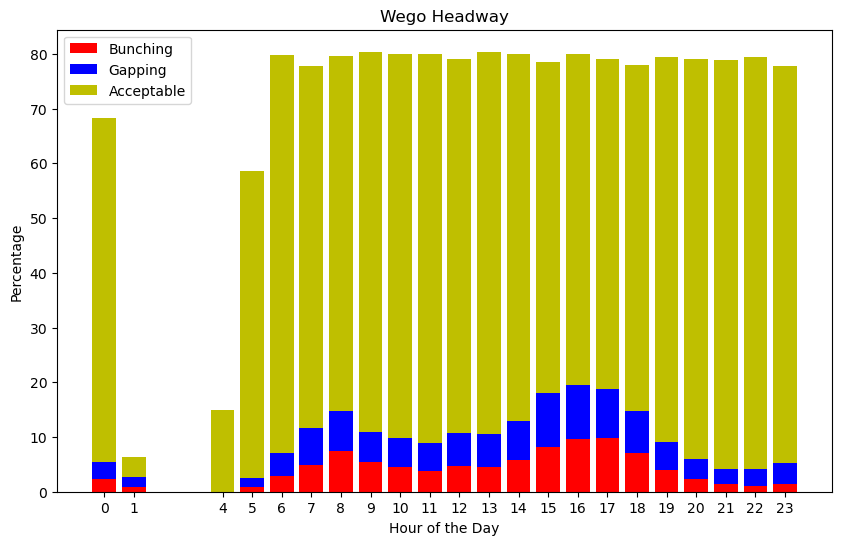

In [80]:
x=wego_hour['hour']
y1=wego_hour['HEADWAY_IS_BUNCHING']
y2=wego_hour['HEADWAY_IS_GAPPING']
y3=wego_hour['HEADWAY_IS_ACCEPTABLE']
# y4=wego_hour['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(10,6))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Hour of the Day")
plt.ylabel("Percentage")
plt.legend(["Bunching", "Gapping", "Acceptable"])
plt.title("Wego Headway")
plt.xticks(x)
plt.show()

In [81]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['day'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean').reset_index()

# Averages for all days indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring on Mondays and Sundays
# the largest average late values occur on Fridays and Saturdays

day      mean       std    median       max            sum
0     Friday -3.692639  5.637897 -2.350000  9.266666 -203113.604928
1   Saturday -3.347112  5.445192 -2.166666  9.416666 -119414.908930
2   Thursday -3.338955  5.439898 -2.083333  9.300000 -185305.305113
3  Wednesday -3.186093  5.094743 -2.050000  9.466666 -179383.405147
4    Tuesday -2.935254  4.519801 -2.000000  9.433333 -164383.005180
5     Sunday -2.423951  4.781963 -1.550000  9.466666  -69203.794716
6     Monday -2.337847  4.058020 -1.650000  9.466666 -109626.341186

In [82]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['hour'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean')

# Averages for all hours indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring at 4am and 5am
# the largest average late values occur at 4pm and 5pm

mean       std    median       max           sum
hour                                                      
17   -4.745297  7.023495 -2.716666  9.333333 -97226.395385
16   -4.634179  6.821733 -2.750000  9.100000 -99491.195271
18   -4.114649  5.930042 -2.616666  9.100000 -69780.329375
15   -4.056079  5.848044 -2.650000  9.233333 -87355.778520
19   -4.015721  5.380919 -2.833333  8.516666 -53421.130116
8    -3.669963  4.979157 -2.400000  9.383333 -74636.028716
1    -3.618168  6.557112 -1.650000  6.316666   -401.616657
23   -3.409196  6.456656 -1.633333  9.300000 -30682.764864
20   -3.357250  4.669901 -2.450000  9.200000 -40723.447174
14   -3.178790  4.845245 -2.183333  9.166666 -64713.812486
0    -2.999833  6.116353 -1.500000  9.200000 -11711.349396
7    -2.941623  4.451030 -2.150000  9.433333 -63762.628833
21   -2.777314  4.270320 -1.966666  9.416666 -32630.664181
22   -2.603200  4.530346 -1.650000  9.466666 -28780.981008
12   -2.514361  4.076169 -1.816666  9.466666 -50211.796295
13   -2.500237  4.029335 -1.783333  9.166666 -49614.712798
9    -2.439060  4.026654 -1.750000  9.300000 -48520.229400
11   -2.157680  3.701852 -1.633333  9.266666 -42542.979753
10   -1.973437  3.827400 -1.400000  9.416666 -38793.830073
6    -1.658481  3.398984 -1.366666  9.333333 -31675.330048
5    -1.191896  3.102987 -1.066666  9.466666 -11896.315164
4    -1.100800  2.247952 -0.750000  3.216666  -1857.049687

# 4

### How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [173]:
# wego.groupby('OPERATOR')[['CALENDAR_ID', 'TRIP_ID']].nunique().reset_index()

# Getting unique trip and operator
unique_trips = wego[['TRIP_ID', 'CALENDAR_ID', 'OPERATOR']].drop_duplicates()

# Grouping by operator to view # trips
operator_trip_counts = unique_trips.groupby('OPERATOR').size().reset_index(name='Number_of_Trips')
operator_trip_counts.sort_values('Number_of_Trips', ascending=False)

OPERATOR  Number_of_Trips
106      1762              786
105      1761              719
164      2164              570
13        379              550
39       1170              532
34       1040              530
38       1147              524
88       1617              513
116      1823              501
48       1222              499
189      2352              493
180      2312              488
51       1266              483
184      2324              481
6         326              469
29        723              468
14        409              465
42       1190              463
201      2424              460
173      2246              460
146      2053              459
277      2793              453
61       1368              444
9         341              438
37       1133              438
45       1204              432
151      2088              418
68       1401              413
133      1927              412
5         304              408
198      2399              407
70       1410              402
264      2733              399
262      2706              398
268      2760              397
155      2109              390
128      1893              390
92       1650              388
281      2832              387
196      2374              386
49       1237              383
312      3090              372
149      2062              372
248      2630              371
8         332              370
91       1623              370
145      2041              368
78       1566              368
273      2780              367
117      1824              365
257      2689              364
79       1582              364
20        520              361
21        522              361
249      2638              355
130      1914              355
80       1590              354
138      1992              353
35       1052              348
304      3031              345
7         329              344
22        559              341
62       1372              335
113      1800              332
296      2990              329
140      2001              328
271      2765              327
110      1788              324
30        778              323
287      2963              321
31        785              320
156      2112              319
55       1343              318
58       1361              317
28        659              317
306      3064              317
141      2012              312
144      2040              311
10        357              309
47       1208              308
147      2055              303
111      1792              303
74       1500              302
150      2082              302
19        517              301
41       1177              295
253      2649              292
217      2500              291
67       1394              285
56       1352              285
127      1892              282
231      2567              281
15        414              281
52       1277              280
44       1202              278
178      2306              278
169      2217              276
53       1305              275
77       1542              274
119      1842              273
163      2161              270
195      2371              269
159      2127              268
107      1763              267
57       1359              266
135      1948              265
94       1682              264
167      2200              263
186      2335              258
100      1717              257
64       1379              255
102      1736              255
73       1489              254
289      2969              252
260      2697              251
310      3087              249
54       1330              248
191      2356              247
148      2059              242
81       1593              241
182      2321              241
221      2529              240
318      3101              240
308      3079              238
324      3122              236
72       1457              231
24        611              230
192      2357              229
276   

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Trips', ylabel='Count'>

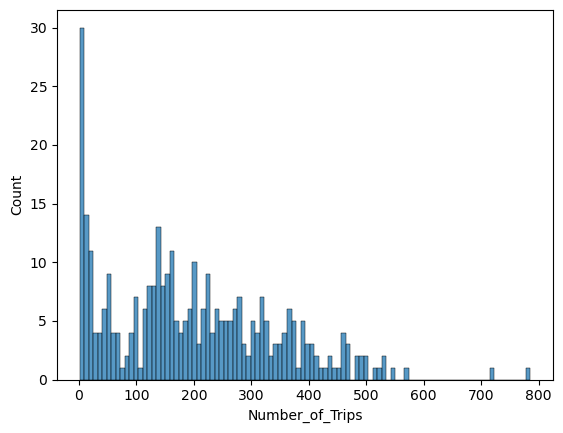

In [174]:
sns.histplot(data=operator_trip_counts, x="Number_of_Trips", bins=100)

In [175]:
perc1=operator_trip_counts['Number_of_Trips'].quantile(0.10)
print(perc1)

# perc99=operator_trip_counts['Number_of_Trips'].quantile(0.90)
# print(perc99)

9.0


In [261]:
operator_trip_counts = operator_trip_counts.drop(operator_trip_counts[operator_trip_counts.Number_of_Trips <50].index)
# operator_trip_counts = operator_trip_counts.drop(operator_trip_counts[operator_trip_counts.Number_of_Trips > perc99].index)

In [270]:
wego_clean = wego[wego['OPERATOR'].isin(operator_trip_counts['OPERATOR'])]

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Trips', ylabel='Count'>

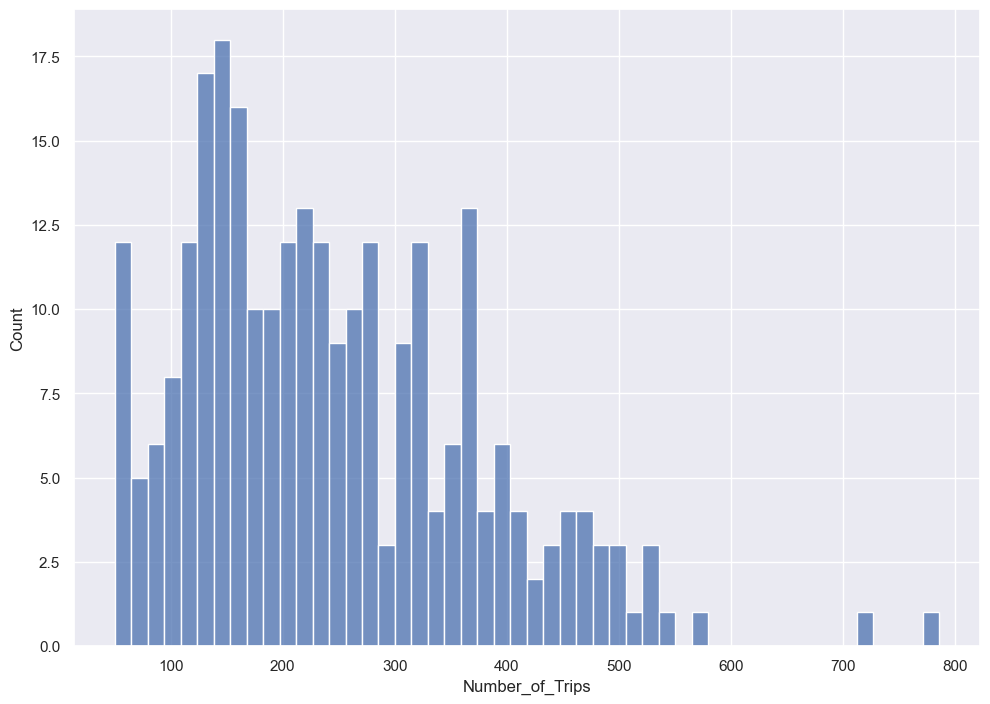

In [262]:
sns.histplot(data=operator_trip_counts, x="Number_of_Trips", bins=50)

In [271]:
# operator_mean = (
(wego_clean.groupby(['OPERATOR'])
[['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
.mean()
).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

# operator_1762 = wego[wego['OPERATOR']==1762]
# t=(operator_1762.groupby(['CALENDAR_ID'])
# [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
# .mean()
# ).reset_index().sort_values('CALENDAR_ID', ascending=True)

OPERATOR  HEADWAY_IS_BUNCHING  HEADWAY_IS_GAPPING  HEADWAY_IS_ACCEPTABLE  \
61       1566             0.014552            0.001819               0.818099   
163      2440             0.004206            0.014721               0.813880   
245      3027             0.016447            0.003289               0.809211   
227      2876             0.008008            0.019019               0.801802   
155      2368             0.001919            0.034549               0.796545   
25       1133             0.021906            0.025749               0.780938   
14        559             0.020267            0.030153               0.780524   
0         304             0.002064            0.049525               0.780437   
107      1927             0.015082            0.015082               0.780059   
145      2321             0.032440            0.019746               0.779267   
235      2972             0.024885            0.019355               0.778802   
184      2573             0.024876            0.039801               0.778607   
196      2629             0.020000            0.043750               0.776250   
53       1410             0.012747            0.028132               0.769670   
38       1266             0.046908            0.015991               0.768657   
111      1992             0.011853            0.022629               0.766164   
146      2322             0.060264            0.015066               0.763653   
176      2534             0.014870            0.028501               0.763321   
269      3156             0.017241            0.017241               0.758621   
265      3138             0.046429            0.017857               0.757143   
71       1623             0.036900            0.038745               0.754613   
18        659             0.059380            0.022070               0.754073   
219      2780             0.026703            0.040976               0.752302   
108      1948             0.028497            0.047927               0.751943   
3         332             0.019941            0.070004               0.750530   
113      2001             0.038164            0.045384               0.747292   
182      2567             0.032797            0.058787               0.743812   
221      2792             0.039531            0.050512               0.743777   
40       1305             0.029040            0.060606               0.741162   
42       1343             0.042123            0.044311               0.740153   
140      2230             0.080714            0.016143               0.739167   
156      2371             0.043972            0.032624               0.737589   
89       1788             0.049410            0.037619               0.736665   
142      2254             0.030598            0.043115               0.735744   
73       1673             0.022164            0.045632               0.735332   
183      2569             0.065134            0.038314               0.731801   
11        517             0.039138            0.060125               0.731707   
257      3102             0.016913            0.040169               0.731501   
130      2138             0.027329            0.039752               0.730435   
86       1763             0.040397            0.032601               0.728561   
255      3100             0.036295            0.038798               0.728411   
96       1824             0.053733            0.048978               0.726581   
4         341             0.006879            0.006879               0.726569   
119      2055             0.041814            0.056537               0.726148   
237      2978             0.025922            0.033898               0.725823   
200      2642             0.006380            0.027113               0.722488   
118      2053             0.025150            0.064516               0.721159   
194      2623             0.018260            0.026853               0.720730   
98       1848             0.024116  

In [272]:
(wego_clean.groupby(['OPERATOR'])
[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
.mean()
).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)

OPERATOR  ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  \
85       1762              0.002157             0.009491   
65       1597              0.000000             0.023256   
199      2639              0.014925             0.009950   
184      2573              0.000000             0.027363   
8         409              0.003384             0.025381   
61       1566              0.007731             0.021828   
151      2355              0.009597             0.021113   
7         379              0.010816             0.024786   
13        522              0.007170             0.029233   
107      1927              0.015920             0.023041   
19        723              0.019936             0.020734   
162      2432              0.017316             0.025974   
23       1040              0.030725             0.012754   
25       1133              0.004996             0.040738   
69       1617              0.018788             0.027879   
50       1394              0.023539             0.030844   
145      2321              0.012694             0.046544   
146      2322              0.032957             0.029190   
40       1305              0.016414             0.046086   
194      2623              0.011815             0.052632   
223      2809              0.022472             0.044944   
157      2374              0.006571             0.061529   
117      2041              0.008425             0.060920   
123      2088              0.025458             0.045825   
75       1703              0.027624             0.049724   
265      3138              0.053571             0.025000   
74       1682              0.006993             0.073109   
87       1780              0.028278             0.056555   
125      2103              0.069085             0.017271   
230      2958              0.032366             0.056920   
193      2610              0.006319             0.083728   
187      2584              0.012121             0.078788   
46       1368              0.015531             0.075928   
26       1147              0.059351             0.032475   
42       1343              0.032276             0.059628   
27       1170              0.088208             0.006132   
66       1598              0.013263             0.082228   
67       1601              0.000000             0.096205   
84       1761              0.082941             0.014609   
201      2649              0.020038             0.079198   
34       1208              0.024229             0.076542   
24       1052              0.004037             0.098039   
78       1716              0.040559             0.061538   
56       1489              0.051628             0.050834   
111      1992              0.010237             0.095366   
47       1372              0.001546             0.108763   
206      2697              0.015789             0.095614   
58       1505              0.010460             0.101464   
136      2207              0.010296             0.101673   
0         304              0.001238             0.113083   
54       1419              0.029948             0.084635   
38       1266              0.025231             0.089552   
53       1410              0.011429             0.105495   
216      2764              0.012800             0.105600   
41       1330              0.038488             0.081176   
95       1823              0.014430             0.105339   
21        785              0.072215             0.047736   
132      2161              0.009121             0.111401   
215      2762              0.023529             0.097059   
202      2669              0.008197             0.112705   
98       1848              0.056270             0.065916   
99       1865              0.022645             0.099638   
83       1743              0.045872             0.078637   
258      3116              0.009412             0.115294   
16        611              0.000000             0.124774   
106      1915              0.083333          

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HEADWAY_IS_ACCEPTABLE', ylabel='Count'>

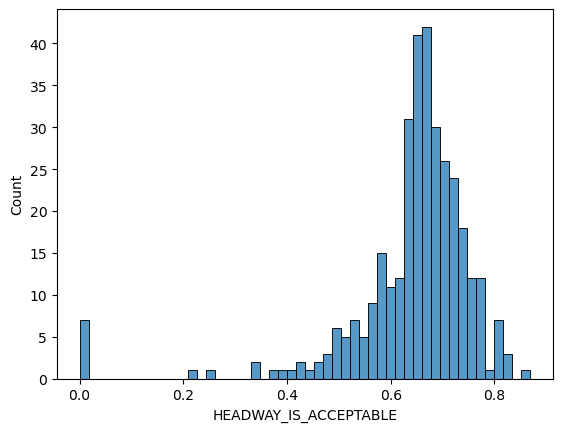

In [211]:
sns.histplot(data=operator_mean, x="HEADWAY_IS_ACCEPTABLE", bins=50)

In [157]:
perc1=operator_mean['HEADWAY_IS_ACCEPTABLE'].quantile(0.05)
print(perc1)

perc99=operator_mean['HEADWAY_IS_ACCEPTABLE'].quantile(0.95)
print(perc99)

# print('')

# perc1_acceptable=wego['HDWY_DEV'].quantile(0.001)
# print(percentile1hdwy)

# percentile99hdwy=wego['HDWY_DEV'].quantile(0.999)
# print(percentile99hdwy)

0.459222150796374
0.7793061765569614


In [158]:
operator_mean = operator_mean.drop(operator_mean[operator_mean.HEADWAY_IS_ACCEPTABLE < perc1].index)
operator_mean = operator_mean.drop(operator_mean[operator_mean.HEADWAY_IS_ACCEPTABLE > perc99].index)
# operator_mean = wego.drop(wego[wego.HDWY_DEV < percentile1hdwy].index)
# operator_mean = wego.drop(wego[wego.HDWY_DEV > percentile99hdwy].index)

# Q5

### Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [226]:
bunching = wego[wego['HEADWAY_IS_BUNCHING']==1][['ADHERENCE', 'HDWY_DEV']].reset_index().sort_values('ADHERENCE')
# t=(operator_1762.groupby(['CALENDAR_ID'])
# [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
# .mean()
# ).reset_index().sort_values('CALENDAR_ID', ascending=True)
bunching

# (wego
#  .groupby(['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN'])
#  ['ADHERENCE']
#  )

index  ADHERENCE   HDWY_DEV
3108    59415 -56.366666 -13.183334
1823    37868 -56.366666  -5.900000
9201   190141 -55.366666  -9.366667
4933    99451 -54.516666  -6.816667
14574  297512 -53.933333  -5.416667
9276   190621 -53.783333 -14.450000
13142  271434 -53.533333 -11.583334
17189  348822 -53.316666 -18.000000
14600  297744 -52.666666  -9.883334
14601  297750 -52.633333  -8.900000
17190  348823 -52.566666 -19.116667
3188    61752 -52.383333 -10.233334
9154   189591 -51.733333 -18.616667
14599  297743 -51.716666  -9.933334
3187    61751 -51.166666 -12.083334
17191  348824 -51.150000 -20.900000
14598  297742 -51.050000  -8.500000
2409    48446 -50.783333  -8.033334
9155   189592 -50.783333 -18.050000
3758    79032 -50.433333  -4.450000
2410    48447 -50.000000 -19.550000
13132  271326 -49.916666 -15.000000
13134  271329 -49.850000 -16.316667
16593  338117 -49.416666  -7.016667
2407    48444 -49.366666  -8.600000
12794  263071 -49.066666 -17.566667
13133  271327 -49.033333 -14.666667
5449   109015 -48.883333 -16.633334
15948  326385 -48.566666 -16.033334
2408    48445 -48.133333  -6.650000
13131  271325 -47.866666 -13.150000
12335  256557 -47.700000 -11.383334
12637  262021 -47.616666 -19.566667
1127    21293 -47.483333  -7.950000
13138  271428 -47.083333 -18.666667
8996   185746 -47.000000  -6.833334
12846  263359 -46.950000 -14.733334
14229  291188 -46.916666  -5.366667
5450   109050 -46.866666 -19.483334
12793  263070 -46.666666 -15.050000
13135  271337 -46.650000 -18.966667
12334  256556 -46.566666 -12.416667
2752    52986 -46.250000  -7.916667
13139  271429 -46.150000 -19.883334
13203  272366 -46.133333 -17.283334
14230  291189 -46.100000  -6.400000
14228  291187 -46.066666  -9.316667
8354   176170 -45.933333  -9.200000
8995   185745 -45.683333  -6.433334
1128    21294 -45.650000  -9.183334
13137  271427 -45.650000 -16.350000
12333  256555 -45.550000 -10.983334
8355   176171 -45.483333 -16.883334
14182  290775 -44.950000  -7.966667
9156   189593 -44.950000 -15.683334
5451   109051 -44.683333 -18.850000
14181  290774 -44.616666  -9.133334
16788  342720 -44.533333 -13.433334
13204  272367 -44.516666 -18.450000
6750   138207 -44.316666 -19.533334
2748    52899 -44.316666 -11.516667
8998   185749 -44.216666  -7.016667
1321    23689 -44.050000  -7.983334
9158   189600 -44.016666 -11.016667
12328  256533 -43.883333  -8.550000
899     17231 -43.850000  -9.800000
5452   109052 -43.833333 -19.833334
12792  263069 -43.816666 -17.050000
13164  271626 -43.633333 -14.566667
8997   185748 -43.616666  -6.250000
9157   189599 -43.550000 -11.016667
9159   189601 -43.533333 -11.466667
1324    23692 -43.450000 -12.533334
6703   137816 -43.450000  -9.083334
13205  272368 -43.116666 -17.233334
6749   138206 -42.916666 -19.766667
14180  290772 -42.916666  -5.883334
1322    23690 -42.900000  -8.400000
2774    54263 -42.683333 -20.816667
3147    61236 -42.550000  -9.383334
14703  299496 -42.450000  -7.650000
12332  256554 -42.383333 -18.850000
1323    23691 -42.350000  -9.000000
2527    49971 -42.300000  -7.950000
900     17232 -42.300000  -9.833334
14479  296708 -42.250000  -7.200000
9153   189590 -42.166666 -14.883334
771     15958 -42.033333  -7.516667
13171  271953 -42.016666 -15.500000
3148    61237 -41.950000  -7.383334
1495    25560 -41.833333 -18.250000
3592    75459 -41.750000 -19.900000
13174  271956 -41.683333 -18.500000
2625    51255 -41.666666  -6.533334
2379    48003 -41.633333  -9.150000
6702   137815 -41.616666  -5.266667
12327  256532 -41.533333  -9.950000
13160  271613 -41.483333 -18.050000
7949   167587 -41.366666 -13.750000
12569  260503 -41.283333 -10.416667
16964  344115 -41.116666 -19.933334
12617  261807 -41.100000  -8.466667
808     16346 -40.983333  -7.533334
2623    51244 -40.950000  -7.350000
13206  272369 -40.883333 -10.066667
13207  272370 -40.666666 -15.283334
11873  249149 -40.650000  -7.800000
12620  261810 -40.600000  -9.733334
809     16347 -40.583333 -19.666667
16963  344114 -40.516666 -19.500000
9285   19105

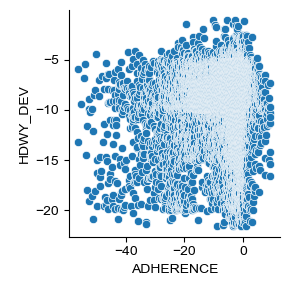

In [230]:
graph = sns.FacetGrid(bunching)
graph.map(sns.scatterplot, 'ADHERENCE', 'HDWY_DEV')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.show()

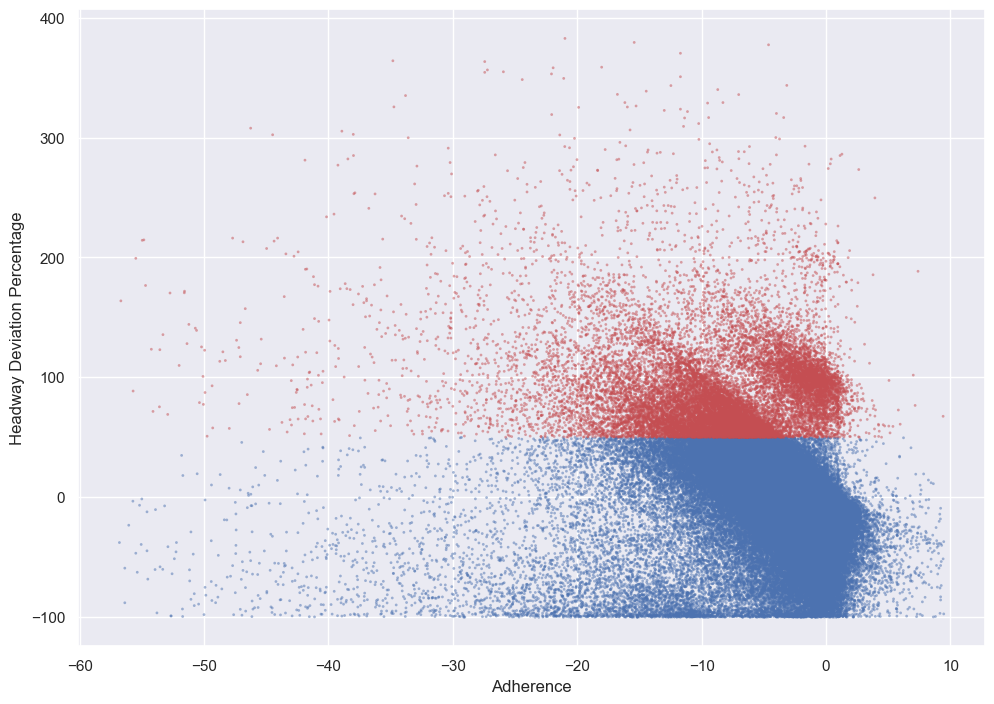

In [336]:
q5 = wego[wego['HEADWAY_DEVIATION_PERCENTAGE']<400]


x = q5['ADHERENCE']
y = q5['HEADWAY_DEVIATION_PERCENTAGE']

warning = y>50

plt.scatter(x[~warning], y[~warning], s=1, alpha=.5, label='unacceptable', facecolors='none', edgecolors='b')
plt.scatter(x[warning], y[warning], s=1, alpha=.5, label='acceptable', facecolors='none', edgecolors='r')

plt.xlabel("Adherence")
plt.ylabel("Headway Deviation Percentage")

plt.show()


# t = q5['ADHERENCE']
# s = q5['HEADWAY_DEVIATION_PERCENTAGE']

# upper = 50
# lower = -50

# supper = np.ma.masked_where(s < upper, s)
# slower = np.ma.masked_where(s > lower, s)
# smiddle = np.ma.masked_where((s < lower) | (s > upper), s)

# fig, ax = plt.subplots()
# ax.plot(t, smiddle, t, slower, t, supper)
# plt.show()

In [334]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(2*x)
plt.scatter(x,y, c=(np.abs(y)), edgecolor='none')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'hot'